In [124]:
import cvxpy as cp
import random
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt

1. Choose any 10 risky assets from the market. These could be stocks, bonds, ETFs, or any
other investable assets with readily available price data.
2. Gather the closing prices for your chosen assets over the past 3 months.

In [86]:
end_date = '2024-02-17'
start_date = '2023-11-17'
stocks = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS","INFY.NS", "ICICIBANK.NS", "HINDUNILVR.NS", "MRF.NS", "TATAMOTORS.NS", "SBIN.NS","IRCTC.NS"] #10 risky assets
prices = yf.download(stocks, start=start_date, end=end_date)['Close']  #closing price
print(prices)

[*********************100%%**********************]  10 of 10 completed


Ticker      HDFCBANK.NS  HINDUNILVR.NS  ICICIBANK.NS      INFY.NS    IRCTC.NS  \
Date                                                                            
2023-11-17  1505.099976    2528.800049    921.849976  1437.550049  707.349976   
2023-11-20  1505.199951    2506.449951    921.450012  1436.599976  701.299988   
2023-11-21  1517.949951    2505.250000    926.099976  1439.000000  708.950012   
2023-11-22  1512.550049    2521.899902    922.750000  1457.800049  700.000000   
2023-11-23  1521.300049    2519.899902    923.000000  1449.250000  700.000000   
...                 ...            ...           ...          ...         ...   
2024-02-12  1390.000000    2385.649902    996.099976  1680.099976  900.099976   
2024-02-13  1394.449951    2394.000000   1019.799988  1684.550049  910.450012   
2024-02-14  1384.050049    2387.949951   1022.700012  1666.199951  929.200012   
2024-02-15  1414.050049    2350.850098   1016.650024  1676.349976  951.500000   
2024-02-16  1419.900024    2

3. Calculate the simple/log returns for each asset over the chosen period.

In [87]:
# Calculate simple returns
simple_returns = prices.pct_change().dropna()

# Calculate log returns
log_returns = np.log(prices / prices.shift(1)).dropna()

print("Simple Returns:")
print(simple_returns)

print("\nLog Returns:")
print(log_returns)

Simple Returns:
Ticker      HDFCBANK.NS  HINDUNILVR.NS  ICICIBANK.NS   INFY.NS  IRCTC.NS  \
Date                                                                       
2023-11-20     0.000066      -0.008838     -0.000434 -0.000661 -0.008553   
2023-11-21     0.008471      -0.000479      0.005046  0.001671  0.010908   
2023-11-22    -0.003557       0.006646     -0.003617  0.013065 -0.012624   
2023-11-23     0.005785      -0.000793      0.000271 -0.005865  0.000000   
2023-11-24     0.007099      -0.001865      0.006934 -0.008177 -0.010286   
...                 ...            ...           ...       ...       ...   
2024-02-12    -0.009689      -0.015882     -0.014445  0.006440 -0.041580   
2024-02-13     0.003201       0.003500      0.023793  0.002649  0.011499   
2024-02-14    -0.007458      -0.002527      0.002844 -0.010893  0.020594   
2024-02-15     0.021676      -0.015536     -0.005916  0.006092  0.023999   
2024-02-16     0.004137       0.010379      0.006492  0.015092 -0.011403

Visualising the data

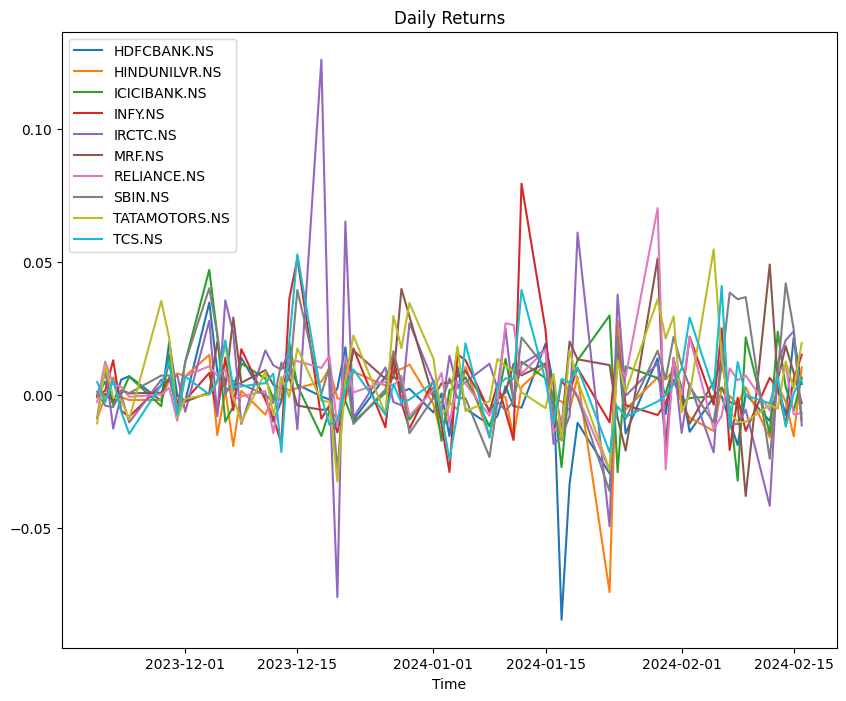

In [89]:
plt.figure(figsize=(10, 8))
for col in simple_returns.columns:
  plt.plot(simple_returns[col], label=col)
plt.title("Daily Returns")
plt.xlabel("Time")
plt.legend()

plt.show()

In [90]:
mu = simple_returns.mean()

In [91]:
print(mu)

Ticker
HDFCBANK.NS     -0.000825
HINDUNILVR.NS   -0.000941
ICICIBANK.NS     0.001798
INFY.NS          0.002911
IRCTC.NS         0.005038
MRF.NS           0.004769
RELIANCE.NS      0.003628
SBIN.NS          0.004946
TATAMOTORS.NS    0.005379
TCS.NS           0.002794
dtype: float64


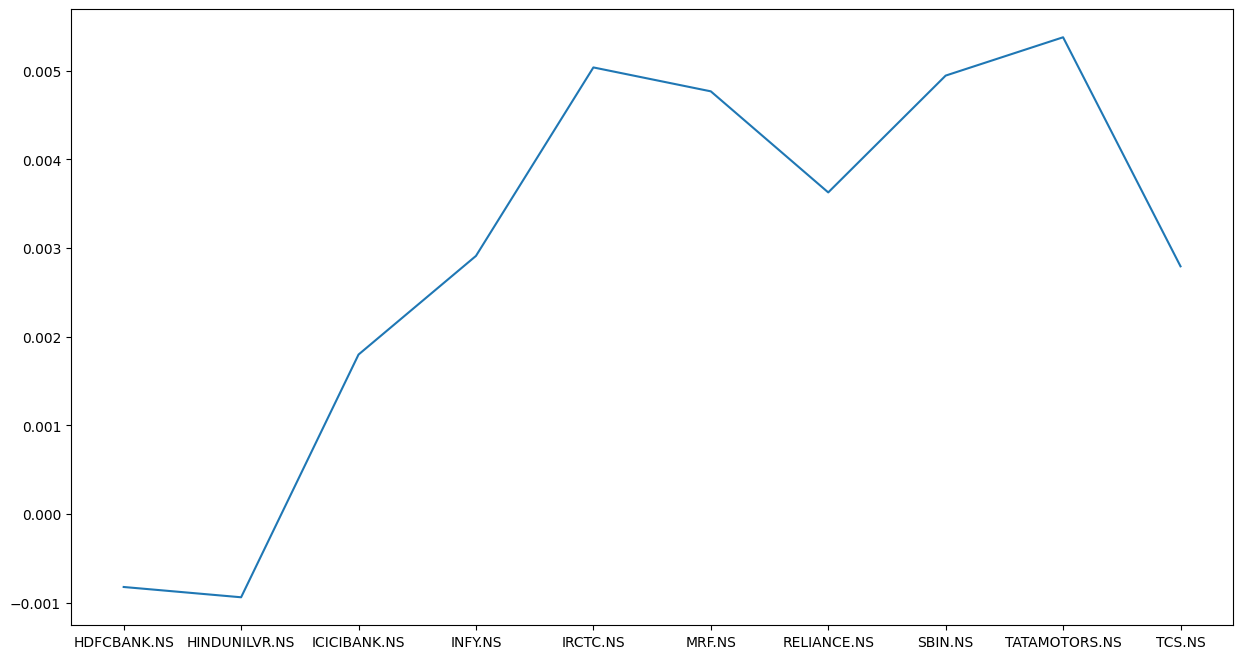

In [92]:
plt.figure(figsize=(15, 8))
plt.plot(mu)

In [93]:
var_daily_returns = simple_returns.var()
cov_matrix = simple_returns.cov()
std_dev_daily_returns = simple_returns.std()
correlation_matrix = simple_returns.corr()

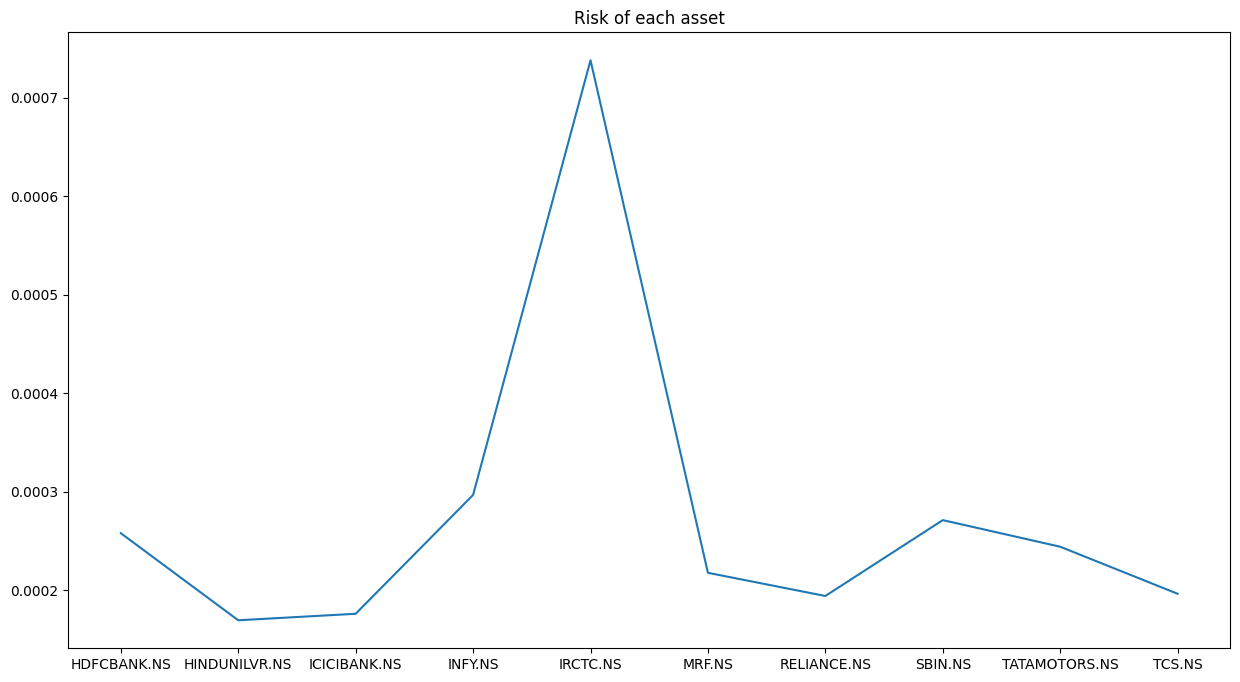

In [94]:
plt.figure(figsize=(15, 8))
plt.title("Risk of each asset")
plt.plot(var_daily_returns)

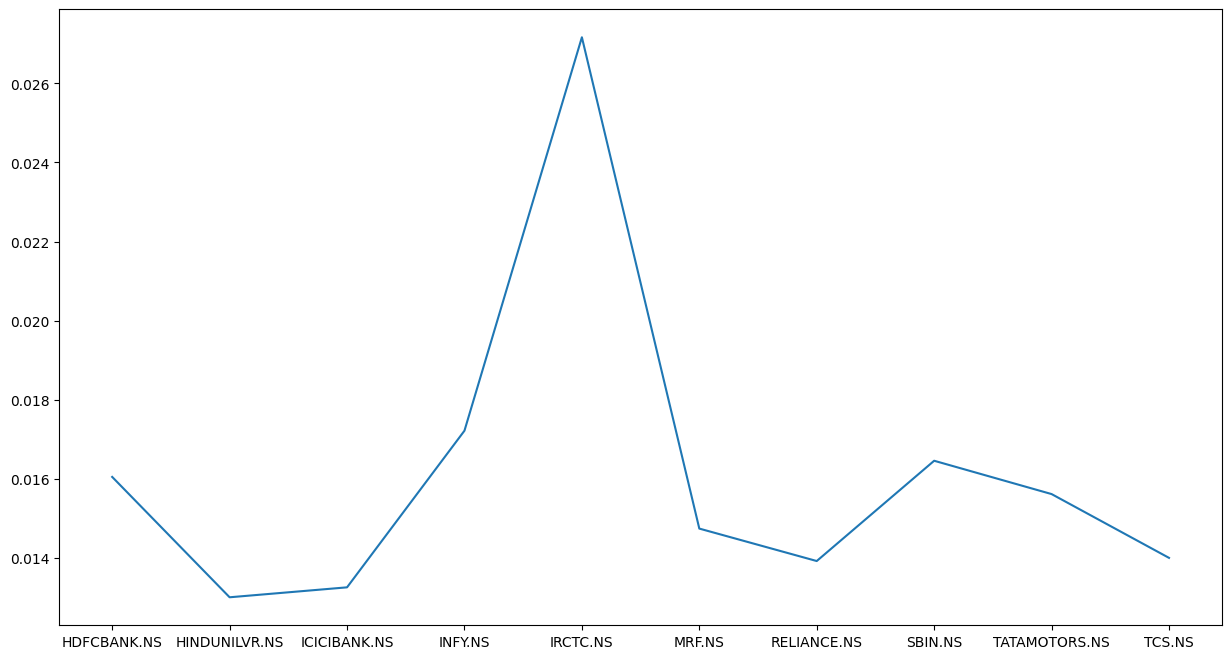

In [96]:
plt.figure(figsize=(15, 8))
plt.plot(std_dev_daily_returns)

In [97]:
cov_matrix

Ticker,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,IRCTC.NS,MRF.NS,RELIANCE.NS,SBIN.NS,TATAMOTORS.NS,TCS.NS
Ticker,,,,,,,,,,
HDFCBANK.NS,0.000258,0.000071,7.313446e-05,0.000038,0.000114,3.200358e-05,0.000069,0.000095,6.227161e-05,7.813203e-06
HINDUNILVR.NS,0.000071,0.000169,-1.762422e-05,0.000056,0.000120,-2.246249e-05,0.000056,0.000082,6.107274e-05,4.013180e-05
ICICIBANK.NS,0.000073,-0.000018,1.759031e-04,0.000028,-0.000012,9.160699e-06,0.000019,0.000041,7.305912e-07,1.428920e-05
INFY.NS,0.000038,0.000056,2.829449e-05,0.000297,0.000033,2.285787e-06,0.000029,0.000054,4.113018e-05,1.878265e-04
IRCTC.NS,0.000114,0.000120,-1.219200e-05,0.000033,0.000738,1.527126e-05,0.000121,0.000119,8.500368e-05,4.400458e-05
MRF.NS,0.000032,-0.000022,9.160699e-06,0.000002,0.000015,2.174935e-04,0.000054,-0.000021,7.174998e-05,-3.237967e-07
RELIANCE.NS,0.000069,0.000056,1.914151e-05,0.000029,0.000121,5.360066e-05,0.000194,0.000094,4.869666e-05,3.611187e-05
SBIN.NS,0.000095,0.000082,4.101182e-05,0.000054,0.000119,-2.070933e-05,0.000094,0.000271,3.776460e-05,6.067558e-05
TATAMOTORS.NS,0.000062,0.000061,7.305912e-07,0.000041,0.000085,7.174998e-05,0.000049,0.000038,2.439830e-04,4.263251e-05


4. Apply Markowitz's mean-variance optimization to construct the efficient frontier.

In [98]:
C=cov_matrix

In [125]:
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

In [132]:
risks=[]
mus=[]
for i in range(10000):
  w= rand_weights(10)
  mu1= np.array(mu)@w.T
  sigma= w@C@w.T
  risks.append(sigma)
  mus.append(mu1)

Text(0.5, 1.0, 'Randomly generated portfolios')

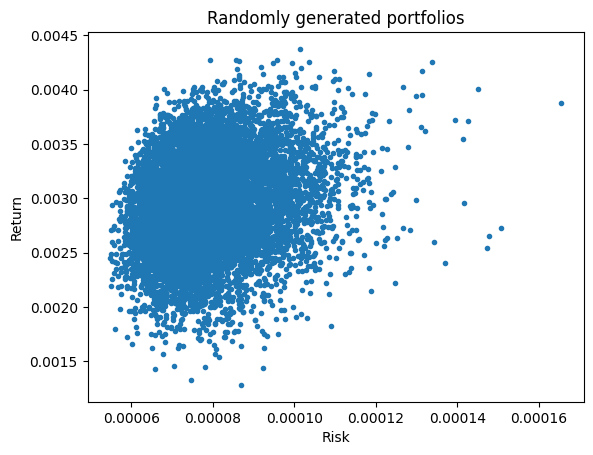

In [133]:
plt.plot(risks, mus, '.')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Randomly generated portfolios')

In [134]:
O=np.array([1]*10)
a=(O@np.linalg.inv(C)@O.T)/2
b=(O@np.linalg.inv(C)@mu.T)/2
c=(mu@np.linalg.inv(C)@O.T)/2
d=(mu@np.linalg.inv(C)@mu.T)/2

In [135]:
mu=np.array(mu)
n_assets = 10
w = cp.Variable(n_assets)
mu1 = mu @ w  # expected return
objective = cp.Maximize(mu1)


frontier_weights = []
frontier_returns = []

for risk in risks:
    constraints = [cp.sum(w) == 1, cp.quad_form(w, C) <= risk]
    problem = cp.Problem(objective, constraints)
    try:
        problem.solve(solver=cp.ECOS)
        if problem.status == 'optimal':
            frontier_weights.append(w.value)
            frontier_returns.append(mu1.value)
    except:
        continue

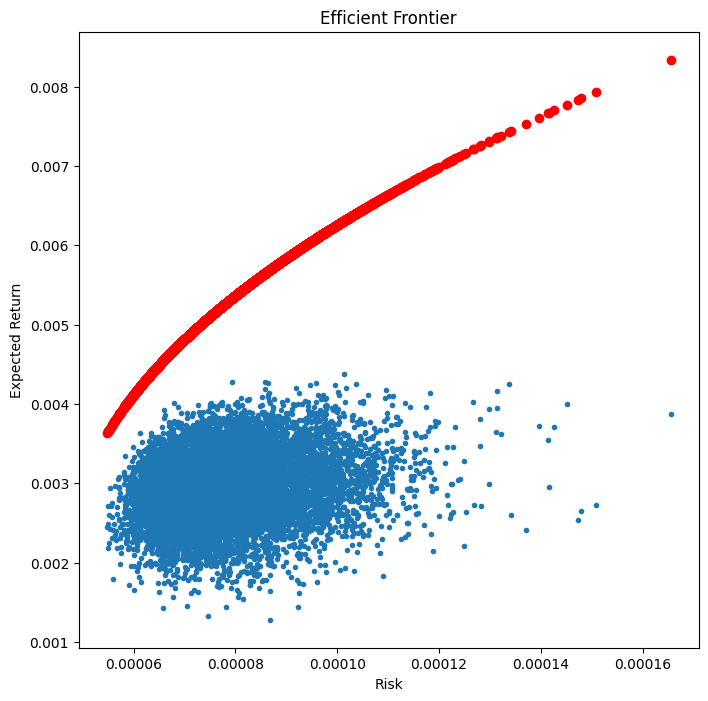

In [136]:
plt.subplots(figsize=(8,8))
plt.scatter(risks, frontier_returns,c='r')
plt.plot(risks, mus, '.')
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.show()

5. Choose two points on the efficient frontier representing two different risk tolerance levels.
For each point, calculate the corresponding weights for each asset to construct a portfolio that
maximizes expected return for that given level of risk.

In [161]:
#Chossing two random risk from risks array
risk1=random.choice(risks)
risk2=random.choice(risks)
random_risks=[risk1,risk2]
w = cp.Variable(n_assets)

mu1 = mu @ w  # expected return
objective = cp.Maximize(mu1)


weights = []
expected_returns = []
for risk in random_risks:
    constraints = [cp.sum(w) == 1, cp.quad_form(w, C) <= risk]
    problem = cp.Problem(objective, constraints)
    try:
        problem.solve(solver=cp.ECOS)
        if problem.status == 'optimal':
            weights.append(w.value)
            expected_returns.append(mu1.value)
    except:
        continue

In [162]:
print("Weight corresponding to risk 1 corresponding to maximum return : ")
print(weights[0])

Weight corresponding to risk 1 corresponding to maximum return : 
[-0.24819279 -0.07762403  0.24626867  0.08914907  0.06656949  0.29357099
  0.08667909  0.26879669  0.23493493  0.03984787]


In [163]:
print("Weight corresponding to risk 2 corresponding to maximum return : ")
print(weights[1])

Weight corresponding to risk 2 corresponding to maximum return : 
[-0.21413747 -0.02149465  0.25171081  0.06682778  0.05635353  0.28346699
  0.07858808  0.23131718  0.20308858  0.06427917]


In [164]:
print("Maximum return corresponding to risk 1 : ")
print(expected_returns[0])

Maximum return corresponding to risk 1 : 
0.005734552919580597


In [165]:
print("Maximum return corresponding to risk 2 : ")
print(expected_returns[1])

Maximum return corresponding to risk 2 : 
0.005181029125899031


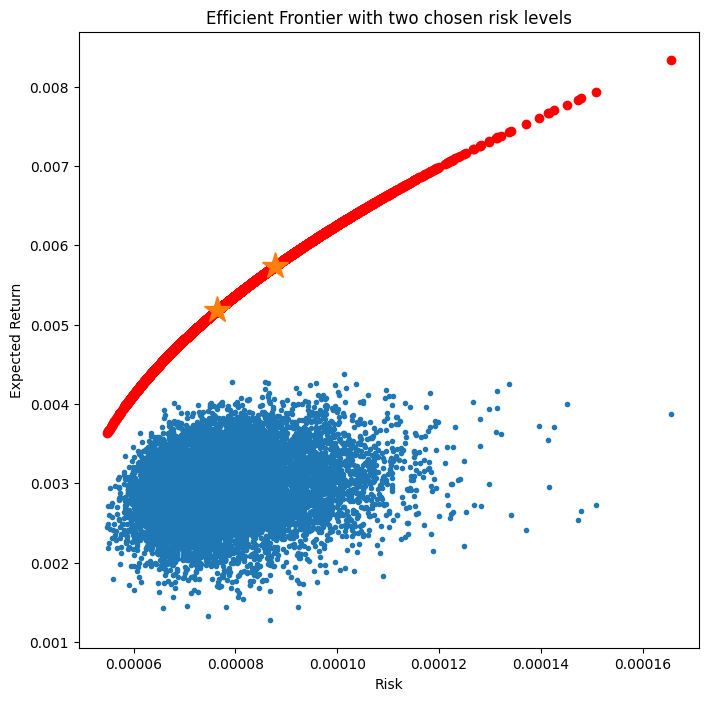

In [166]:
plt.subplots(figsize=(8,8))
plt.scatter(risks, frontier_returns,c='r')
plt.plot(risks, mus, '.')
plt.plot(random_risks, expected_returns, '*',markersize=20)
plt.title('Efficient Frontier with two chosen risk levels')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.show()